# Linear (ordinary) least squares

Suppose we have a set of points $\left\{ (x_i, y_i), i = 1, \ldots, n \right\}$ and a functional form $f(x, \vec \beta)$, where $\vec \beta$ is a vector of parameters.

Then, *least squares approximation* is a problem of finding $\vec \beta$ by minimising function
$$ \xi (\vec \beta) = \sum\limits_{i = 1}^n \left| y_i - f(x_i, \vec \beta) \right|^2 $$

Least squares approximation becomes *linear (or ordinary)* when we assume that $f(x, \vec \beta)$ is a linear function of $\vec \beta$: 
$$f(x, \vec \beta) = \sum \limits_{j = 1}^m \beta_j \varphi_j (x),$$
where $\varphi_j (x)$ are called basis functions which do not need to be linear ($x^k$, $e^{i \alpha_k x}$ etc.).

We minimize with respect to $\vec \beta$
$$ \xi (\vec \beta) = \sum\limits_{i = 1}^n \left| y_i - \left( \beta_1 \varphi_1(x) + \ldots + \beta_m \varphi_m(x) \right) \right|^2 .$$
It can be represented as 
$$\xi (\vec \beta) = || \vec y - A \vec \beta ||^2,$$
if we suppose that a vector norm $||\vec a|| = \sqrt{\sum\limits_{i = 1}^n |a_i|^2}$ and *the design matrix*
$$ A = \begin{pmatrix} 
            \varphi_1(x_1) & \varphi_2(x_1) & \ldots & \varphi_m(x_1) \\
            \varphi_1(x_2) & \varphi_2(x_2) & \ldots & \varphi_m(x_2) \\
            \vdots & \vdots & \ddots & \vdots \\
            \varphi_1(x_n) & \varphi_2(x_n) & \ldots & \varphi_m(x_n) \\
        \end{pmatrix}.$$

To minimize $\xi (\vec \beta)$ we set 
$$\cfrac{\partial}{\partial \beta_k} \xi (\vec \beta) = 0, \; k = 1, \ldots, m, $$
and obtain *the normal equation*
$$A^T A \vec \beta = A^T \vec y.$$

If $A$ is poorly conditioned, then solving this matrix equation becomes a big problem. In this case QR decomposition of $A$ is often used. The design matrix can be represented as 
$$A = Q \cdot R,$$
where $Q$ is orthoginal ($Q^T Q = 1$), and $R$ is upper triangular.

Since $m < n$ last $n-m$ rows of $R$ are zero:
$$A = Q \cdot \begin{pmatrix} 
                    R_1 \\
                    0 \\
                \end{pmatrix}.$$
Recall tht matrix $Q$ is a rotation operator, and introduced norm of a vector is invariant to rotation. Then, we rotate the residual $\vec y - A \vec \beta$:
$$\xi (\vec \beta) = || \vec y - A \vec \beta ||^2 = || Q^T \left( \vec y - A \vec \beta \right) ||^2 = || Q^T \vec y - \begin{pmatrix} 
    R_1 \\
    0 \\
\end{pmatrix} \vec \beta ||^2. $$

Let us write 
$$Q^T \vec y = \begin{pmatrix} 
                    \vec f \\
                    \vec r \\
                \end{pmatrix},$$
where $\mbox{dim} \vec f = m$.

This way,
$$\xi ( \vec \beta ) = ||\vec f - R_1 \vec \beta||^2 + ||\vec r||^2 \rightarrow \min \Leftrightarrow R_1 \vec \beta = \vec f.$$

The last equation is solved by back substitution.

## Task

Let the basis function be $x^k, \; k = 0, \ldots, m$. Write function that finds $\vec \beta$ for $m = 1, 2, 3$.

In [2]:
def minor(arr,i,j):
    # ith row, jth column removed
    return arr[np.array(list(range(i))+list(range(i+1,arr.shape[0])))[:,np.newaxis],
               np.array(list(range(j))+list(range(j+1,arr.shape[1])))]

def hh(vec,p):
    vec = np.asarray(vec, dtype=float)
    if vec.ndim != 1:
        raise ValueError("vec.ndim = %s, expected 1" % vec.ndim)
    x = vec
    n = len(x)
    y = np.array(x, copy=True, dtype=float)
    y[p] = np.linalg.norm(x)
    for k in range(p+1,n):
        y[k] = 0
    d = x - y
    u = d / np.linalg.norm(d)
    h = np.eye(n)
    for i in range(n):
        for j in range(n):
            h[i, j] = h[i, j] - 2 * u[i] * u[j]
    outvec = y
    H = h
    return outvec, H

def qr_decomp(a):
    a1 = np.array(a, copy=True, dtype=float)
    m, n = a1.shape
    data_a =[]
    data_h = []
    data_H = []
    H = np.eye(m)
    for i in range(n-1):
        x = a1[:,0]
        y,h = hh(a1[:,0],0)
        a1 = h@a1
        data_a.append(a1)
        data_h.append(h)
        a1 =minor(a1,0,0)
    x = a1[:,0]
    y,h = hh(a1[:,0],0)
    a1 = h@a1
    data_a.append(a1)
    data_h.append(h)
    #print(*data_a)

    r = data_a[0]
    for i in range(1,len(data_a)):
        am, an = data_a[i].shape
        for k in range(m-am,m):
            for j in range(n-an,n):
                r[k,j] = data_a[i][k-i,j-i]

    for i in range(0,len(data_h)):
        hm, hn = data_h[i].shape
        h = np.eye(m)
        for k in range(m-hm,m):
            for j in range(m-hm,m):
                h[k,j] = data_h[i][k-i,j-i]
        data_H.append(h)
        H = H@h

    q = H
    return q, r


In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import qr


In [4]:
def linear_least_squares(m, xdata, ydata):
    
    diabetes = datasets.load_iris()
    X = diabetes.data
    y = diabetes.target

    ydata = X[:100,-1]
    xdata = X[:100,0]
    #np.set_printoptions(suppress=True)

    mat= np.empty((100,m))
    A= np.zeros_like(mat)
    for i in range(m):
        A[:,i] = xdata**i
    q, r = qr_decomp(A)
    r1= np.empty((m,m))
    
    for i in range(m):
        r1[i] = r[i]

    q1= np.empty((100,m))
    for i in range(m):
        q1[:,i] = q[:,i]

    result =q.T@ydata
    f = result[:m]
    rinv = np.linalg.inv(r1) 
    beta = rinv@f
    beta
    
    return beta

Now implement your function to approximate real data.

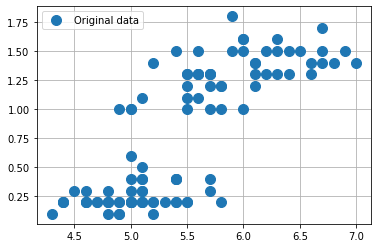

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt

diabetes = datasets.load_iris()
X = diabetes.data
y = diabetes.target

ydata = X[:100,-1]
xdata = X[:100,0]

plt.plot(xdata, ydata, 'o', label='Original data', markersize=10)
plt.grid(True)
plt.legend()
#plt.plot(x,y3)
plt.show()

Plot the resulting functions.

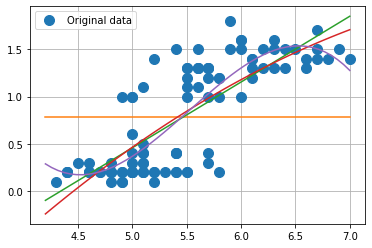

In [30]:
x = np.linspace(4.2,7)

def fun(x,b):
    n = len(b)
    res = 0
    for i in range(n):
        res += b[i]*(x**i)
    return res
        
plt.plot(xdata, ydata, 'o', label='Original data', markersize=10)
plt.grid(True)
plt.legend()

for i in range(1,5):
    plt.plot(x, fun(x,linear_least_squares(i,xdata,ydata)))
plt.show()

Output the comma-separated list of coefficients before $x$. You will need this for Google Form.

In [9]:
coefs = []
# assuming that beta[1] is always a coefficient before x
#if m =1, then beta[1] does not exist,beacuse len(beta)= 1, not 2 ==> therefore the cycle of m in range(2,4)
for m in range(2, 4):
    coefs.append(str(linear_least_squares(m, xdata, ydata)[1]))
    
print(",".join(coefs))

0.695419455966875,1.7384067440848385


Output the comma-separated list of average quadratic deviations. You will need this for Google Form.

*Reminder*: Average quadratic deviation = $\cfrac{1}{n} \sum\limits_{i = 1}^{n} \left| y_i - f(x_i, \vec \beta) \right|^2 $, where $n$ is the number of observations.

In [22]:
def av_quad(m):
    sum = 0
    for i in range(100):
        fct  = fun(xdata[i],linear_least_squares(m,xdata,ydata))
        delta = abs(ydata[i] - fct)
        sum += delta 
    sum /= 100
    return sum

In [28]:
aqds = []

for m in range(1, 4):
    cur_aqd = av_quad(m)
    
    aqds.append(str(cur_aqd))
    
print(",".join(aqds))

0.54,0.283938738013879,0.2817246796800114
